# SD cpp application

In [1]:
import subprocess
from PIL import Image

# %pip install -e /mnt/storage/git_repos/sd_app
from scsd.sd_handler import SDHandler

In [2]:
normal = subprocess.run(["sd", "--help"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, text=True)
print(normal.stdout)

usage: sd [arguments]

arguments:
  -h, --help                         show this help message and exit
  -M, --mode [txt2img or img2img]    generation mode (default: txt2img)
  -t, --threads N                    number of threads to use during computation (default: -1).
                                     If threads <= 0, then threads will be set to the number of CPU physical cores
  -m, --model [MODEL]                path to model
  --vae [VAE]                        path to vae
  --taesd [TAESD_PATH]               path to taesd. Using Tiny AutoEncoder for fast decoding (low quality)
  --upscale-model [ESRGAN_PATH]      path to esrgan model. Upscale images after generate, just RealESRGAN_x4plus_anime_6B supported by now.
  --type [TYPE]                      weight type (f32, f16, q4_0, q4_1, q5_0, q5_1, q8_0)
                                     If not specified, the default is the type of the weight file.
  --lora-model-dir [DIR]             lora model directory
  -i, --init-img [IM

ggml_init_cublas: GGML_CUDA_FORCE_MMQ:   no
ggml_init_cublas: CUDA_USE_TENSOR_CORES: yes
ggml_init_cublas: found 1 CUDA devices:
  Device 0: NVIDIA GeForce RTX 3060, compute capability 8.6
[WARN ] stable-diffusion.cpp:132  - Flash Attention not supported with GPU Backend
[WARN ] model.cpp:1384 - unknown tensor 'cond_stage_model.transformer.text_model.text_projection' in model file


[INFO ] stable-diffusion.cpp:137  - loading model from '/home/skim/sd/models/sd_turbo.safetensors'
[INFO ] model.cpp:639  - load /home/skim/sd/models/sd_turbo.safetensors using safetensors format
[INFO ] stable-diffusion.cpp:163  - Stable Diffusion 2.x 
[INFO ] stable-diffusion.cpp:169  - Stable Diffusion weight type: f16
[INFO ] stable-diffusion.cpp:264  - total memory buffer size = 2450.99MB (clip 684.18MB, unet 1662.35MB, vae 104.47MB)
[INFO ] stable-diffusion.cpp:270  - loading model from '/home/skim/sd/models/sd_turbo.safetensors' completed, taking 1.10s
[INFO ] stable-diffusion.cpp:284  - running in eps-prediction mode
[INFO ] stable-diffusion.cpp:294  - running with Karras schedule
[INFO ] stable-diffusion.cpp:1182 - apply_loras completed, taking 0.00s
[INFO ] stable-diffusion.cpp:1221 - get_learned_condition completed, taking 23 ms
[INFO ] stable-diffusion.cpp:1231 - sampling using Euler A method
[INFO ] stable-diffusion.cpp:1235 - generating image: 1/1 - seed 1799954234
  |===

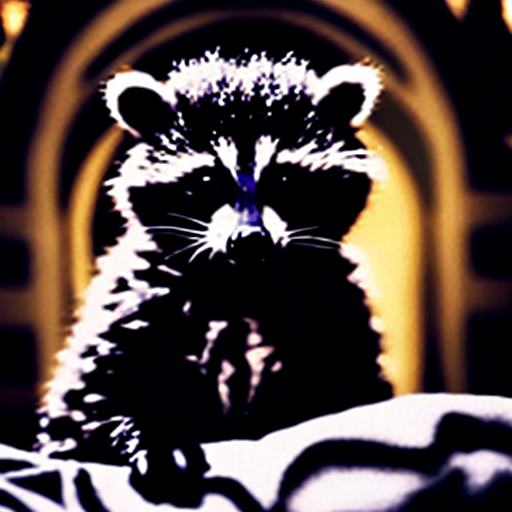

In [15]:
sd = SDHandler()
# sd.set_sd14()
# sd.set_sd15()
# sd.set_sdxl()
# sd.set_sd15_lcm()
# sd.set_sdxl_turbo()
sd.set_sd_turbo()
sd.sd_dict["steps"] = 10
sd.sd_dict["type"] = "f16"
sd.sd_dict["schedule"] = "karras"
# sd.sd_dict['sampling-method'] = "euler_a"

prompt = "a lovely cat<lora:lcm-lora-sdv1-5:1>"
prompt = "a lovely cat"
prompt = "A cinematic shot of a baby racoon wearing an intricate italian priest robe."
output = "racoon.png"
sd.generate(prompt, output)

In [5]:
prompt = "a cat wearing a black magician's hat on a woodbox"
cmd = [
    "sd",
    "--model",
    "/home/skim/sd/models/sd_xl_base_1.0.safetensors",
    "--vae",
    "/home/skim/sd/models/sdxl_vae.safetensors",
    "--output",
    "./output/cat.png",
    "--height",
    "1024",
    "--width",
    "1024",
    "--prompt",
    prompt,
]
normal = subprocess.run(cmd, check=True, text=True)
print(normal.stdout)

ggml_init_cublas: GGML_CUDA_FORCE_MMQ:   no
ggml_init_cublas: CUDA_USE_TENSOR_CORES: yes
ggml_init_cublas: found 1 CUDA devices:
  Device 0: NVIDIA GeForce RTX 3060, compute capability 8.6
[WARN ] stable-diffusion.cpp:132  - Flash Attention not supported with GPU Backend


[INFO ] stable-diffusion.cpp:137  - loading model from '/home/skim/sd/models/sd_xl_base_1.0.safetensors'
[INFO ] model.cpp:639  - load /home/skim/sd/models/sd_xl_base_1.0.safetensors using safetensors format
[INFO ] stable-diffusion.cpp:146  - loading vae from '/home/skim/sd/models/sdxl_vae.safetensors'
[INFO ] model.cpp:639  - load /home/skim/sd/models/sdxl_vae.safetensors using safetensors format
[INFO ] stable-diffusion.cpp:163  - Stable Diffusion XL 
[INFO ] stable-diffusion.cpp:169  - Stable Diffusion weight type: f16
[INFO ] stable-diffusion.cpp:264  - total memory buffer size = 6588.56MB (clip 1574.66MB, unet 4909.43MB, vae 104.47MB)
[INFO ] stable-diffusion.cpp:270  - loading model from '/home/skim/sd/models/sd_xl_base_1.0.safetensors' completed, taking 7.94s
[INFO ] stable-diffusion.cpp:284  - running in eps-prediction mode
[INFO ] stable-diffusion.cpp:1182 - apply_loras completed, taking 0.00s
[INFO ] stable-diffusion.cpp:1221 - get_learned_condition completed, taking 1403 ms

In [15]:
prompt = "a cat wearing a black magician's hat on a woodbox"
cmd = [
    "sd",
    "--mode",
    "img2img",
    "--model",
    "/home/skim/sd/models/v1-5-pruned-emaonly.safetensors",
    "--type",
    "f32",
    # "--vae",
    # "/home/skim/sd/models/sdxl_vae.safetensors",
    "--init-img",
    "./output/cat.png",
    "--output",
    "./output/cat_refined.png",
    "--height",
    "512",
    "--width",
    "512",
    "--seed",
    "-1",
    "--prompt",
    prompt,
]
normal = subprocess.run(cmd, check=True, text=True)
print(normal.stdout)

ggml_init_cublas: GGML_CUDA_FORCE_MMQ:   no
ggml_init_cublas: CUDA_USE_TENSOR_CORES: yes
ggml_init_cublas: found 1 CUDA devices:
  Device 0: NVIDIA GeForce RTX 3060, compute capability 8.6
[WARN ] stable-diffusion.cpp:132  - Flash Attention not supported with GPU Backend


[INFO ] stable-diffusion.cpp:137  - loading model from '/home/skim/sd/models/v1-5-pruned-emaonly.safetensors'
[INFO ] model.cpp:639  - load /home/skim/sd/models/v1-5-pruned-emaonly.safetensors using safetensors format
[INFO ] stable-diffusion.cpp:163  - Stable Diffusion 1.x 
[INFO ] stable-diffusion.cpp:169  - Stable Diffusion weight type: f32
[INFO ] stable-diffusion.cpp:264  - total memory buffer size = 2832.93MB (clip 479.66MB, unet 2165.24MB, vae 188.03MB)
[INFO ] stable-diffusion.cpp:270  - loading model from '/home/skim/sd/models/v1-5-pruned-emaonly.safetensors' completed, taking 1.07s
[INFO ] stable-diffusion.cpp:284  - running in eps-prediction mode
[INFO ] stable-diffusion.cpp:1314 - img2img 1024x1024
[INFO ] stable-diffusion.cpp:1318 - target t_enc is 15 steps
[INFO ] stable-diffusion.cpp:1355 - apply_loras completed, taking 0.00s
[INFO ] stable-diffusion.cpp:1369 - encode_first_stage completed, taking 1.19s
[INFO ] stable-diffusion.cpp:1386 - get_learned_condition completed,

ggml_init_cublas: GGML_CUDA_FORCE_MMQ:   no
ggml_init_cublas: CUDA_USE_TENSOR_CORES: yes
ggml_init_cublas: found 1 CUDA devices:
  Device 0: NVIDIA GeForce RTX 3060, compute capability 8.6
[WARN ] stable-diffusion.cpp:132  - Flash Attention not supported with GPU Backend


[INFO ] stable-diffusion.cpp:137  - loading model from '/home/skim/sd/models/v1-5-pruned-emaonly.safetensors'
[INFO ] model.cpp:639  - load /home/skim/sd/models/v1-5-pruned-emaonly.safetensors using safetensors format
[INFO ] stable-diffusion.cpp:163  - Stable Diffusion 1.x 
[INFO ] stable-diffusion.cpp:169  - Stable Diffusion weight type: f32
[INFO ] stable-diffusion.cpp:264  - total memory buffer size = 2749.37MB (clip 479.66MB, unet 2165.24MB, vae 104.47MB)
[INFO ] stable-diffusion.cpp:270  - loading model from '/home/skim/sd/models/v1-5-pruned-emaonly.safetensors' completed, taking 0.92s
[INFO ] stable-diffusion.cpp:284  - running in eps-prediction mode
[INFO ] model.cpp:639  - load /home/skim/sd/models/lcm-lora-sdv1-5.safetensors using safetensors format
[INFO ] lora.hpp:35   - loading LoRA from '/home/skim/sd/models/lcm-lora-sdv1-5.safetensors'


[WARN ] model.cpp:645  - unknown format 


[INFO ] stable-diffusion.cpp:379  - lora 'lcm-lora-sdv1-5' applied, taking 0.36s
[INFO ] stable-diffusion.cpp:1182 - apply_loras completed, taking 0.36s
[INFO ] stable-diffusion.cpp:1221 - get_learned_condition completed, taking 14 ms
[INFO ] stable-diffusion.cpp:1231 - sampling using Euler A method
[INFO ] stable-diffusion.cpp:1235 - generating image: 1/1 - seed 1454385999
  |==================================================| 4/4 - 6.78it/s
[INFO ] stable-diffusion.cpp:1247 - sampling completed, taking 0.61s
[INFO ] stable-diffusion.cpp:1255 - generating 1 latent images completed, taking 0.61s
[INFO ] stable-diffusion.cpp:1257 - decoding 1 latents
[INFO ] stable-diffusion.cpp:1267 - latent 1 decoded, taking 0.61s
[INFO ] stable-diffusion.cpp:1271 - decode_first_stage completed, taking 0.61s
[INFO ] stable-diffusion.cpp:1288 - txt2img completed in 1.23s


double free or corruption (!prev)


None


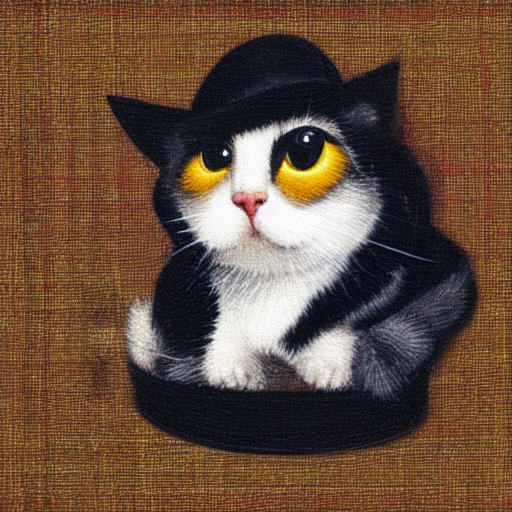

In [20]:
prompt = "a cat wearing a black magician's hat on a woodbox<lora:lcm-lora-sdv1-5:1>"
output_path = "./output/cat_lora.png"

cmd = [
    "sd",
    "--mode",
    "txt2img",
    "--model",
    "/home/skim/sd/models/v1-5-pruned-emaonly.safetensors",
    "--type",
    "f32",
    # "--vae",
    # "/home/skim/sd/models/sdxl_vae.safetensors",
    "--lora-model-dir",
    "/home/skim/sd/models/",
    # "--init-img",
    # "./output/cat.png",
    "--output",
    output_path,
    "--height",
    "512",
    "--width",
    "512",
    "--seed",
    "-1",
    "--steps",
    "4",
    "--cfg-scale",
    "1",
    "--prompt",
    prompt,
]
normal = subprocess.run(cmd, check=False, text=True)
print(normal.stdout)

img = Image.open(output_path)
img